# Web Scraping

In [1]:
url='https://bit.ly/2QjOT2Z'

In [6]:
import os
os.getcwd()

'C:\\Users\\sreekar chidurala\\Desktop\\text mining'

In [7]:
!pip install selenium

In [9]:
from selenium import webdriver
browser=webdriver.Chrome("Chromedriver.exe")

In [10]:
browser.get(url)

In [14]:
parent_tags=browser.find_elements_by_css_selector('li.job-listing')
len(parent_tags)


25

In [46]:

import pandas as pd
import bs4

In [57]:
jobs=pd.DataFrame()
for job in parent_tags:
    title_tag=job.find_element_by_css_selector('span.job-title-text')
    #print(title_tag)
    title=title_tag.get_attribute('innerHTML').replace('<b>' ,'').replace('</b>','')
    
    
    company_tag=job.find_element_by_css_selector('span.company-name-text')
    #print(title_tag)
    company=company_tag.get_attribute('innerHTML')
    
    location_tag=job.find_element_by_css_selector('span.job-location')
    location_tag=location_tag.find_element_by_css_selector('span')
    #print(title_tag)
    location=location_tag.get_attribute('innerHTML')
    
    
    description_tag=job.find_element_by_css_selector('div.job-description')
    description=description_tag.get_attribute('innerHTML')
     #rep_str='...<span class="job-attribution">'
    description = bs4.BeautifulSoup(description,'html.parser').text
    #print(title,'|',company, '|',location)
    #print(description)
    #print('-------')
    
    
    
    curr_job={"title":title,
            'company':company,
            'location':location,
            'description':description}
    jobs=jobs.append(curr_job,ignore_index=True)
    
    

In [58]:
jobs

,company,description,location,title
0,YASH Technologies,"YASH Technologies, a leading enterprise busine...","Plot No. 23/1, IT &amp; ITES MIDC, , Phase-3, ...",Data Science Architect
1,Accenture in India,We are looking for someone who has a comprehen...,"Bangalore, IN",Data Science Specialist
2,Swiggy,The Data Science team is a team of scientists ...,"Bengaluru, Karnataka, India",Data Science Intern
3,Accenture in India,Job Requirements : 1 Responsibilities :A:Manag...,"Mumbai, IN",Data Science for Banking
4,Biz2Credit,Must demonstrate Macro and Micro level skills ...,"Noida, Uttar Pradesh, India",Head - Data Science and Analytics
5,Talentica Software,Hands-on experience with use of standard natur...,"Pune, Maharashtra, India",Data Science Expert-NLP
6,Indus Insights,Indus Insights is looking for top notch talent...,"805 Tower A Spaze TechPark Sohna Road, Gurgaon...",Data Science Associate
7,Indus Insights,Indus Insights is looking for top-notch profes...,"805 Tower A Spaze TechPark Sohna Road, Gurgaon...",Data Science Manager
8,Hewlett Packard Enterprise,"Strong Microsoft Excel, Access and PowerPoint ...","Bangalore, IN",Global Operations Data Science Consultant
9,Arnold Consulting Private Limited,We are looking for outstanding machine learnin...,"Bengaluru Area, India",Data Scientist


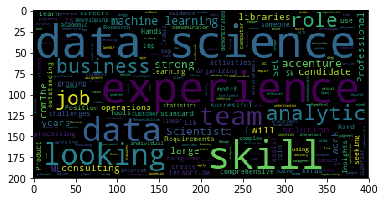

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud().generate(''.join(jobs['description']))
plt.imshow(wc)

# Text Summarization

In [61]:
!pip install sumy

  Running setup.py bdist_wheel for breadability: started
  Running setup.py bdist_wheel for breadability: finished with status 'done'
  Stored in directory: C:\Users\sreekar chidurala\AppData\Local\pip\Cache\wheels\5a\4d\a1\510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Running setup.py bdist_wheel for docopt: started
  Running setup.py bdist_wheel for docopt: finished with status 'done'
  Stored in directory: C:\Users\sreekar chidurala\AppData\Local\pip\Cache\wheels\9b\04\dd\7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built breadability docopt


In [62]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer


In [64]:
from sumy.summarizers.lex_rank import LexRankSummarizer

In [66]:
url="https://www.livemint.com/Companies/b4LtGm53W966uRNUiVQQKL/Maggi-case-Supreme-Court-revives-classaction-suit-against.html?utm_campaign=fullarticle&utm_medium=referral&utm_source=inshorts"
browser.get(url)

In [72]:
div_tag = browser.find_element_by_css_selector('div.content')
para_tags= div_tag.find_elements_by_css_selector('p')
len(para_tags)

12

In [74]:
sentences=''
for para in para_tags:
    para_text= para.get_attribute('innerHTML')
    sentences= sentences+' '+ para_text
    sentences=bs4.BeautifulSoup(sentences,'html.parser').text

In [76]:
sentences[:20]

' New Delhi: In a set'

In [78]:
import nltk

In [79]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\sreekar
[nltk_data]     chidurala\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [89]:
parser=PlaintextParser(sentences,Tokenizer('english'))
summarizer=LexRankSummarizer()
summarized_sentences=summarizer(parser.document,4)

for sentence in summarized_sentences:
    print(sentence)
    print('-----')


New Delhi: In a setback to Nestle India Ltd, the Supreme Court on Thursday lifted a stay on the proceedings of a class-action suit filed by the central government against the maker of Maggi noodles in the apex consumer court.
-----
The National Consumer Disputes Redressal Commission (NCDRC) can now continue proceedings against Nestle India, based on  the results of tests of Maggi noodle samples conducted by the Central Food Technological Research Institute (CFTRI) in Mysuru.
-----
Maggi was banned by FSSAI on 5 June 2015 for five months for allegedly containing lead beyond permissible limits, forcing Nestle India to withdraw the product from the market.
-----
Nestle said that Maggi, which once enjoyed a 75% share of the market before the ban, clawed back to 60% in 2016.
-----
